# 4.8b Grouping Data & Aggregating Variables

# Contents
# 1. Use group by and agg to group data
# 2. Create new categories
# 3. Create flag

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
# def file path
path = r'/Users/alison/Documents/Data Analysis - Tasks/Instacart  Basket Analysis' 
#get df ords_prods_merged
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_ords_prods_merged.pkl'))

In [3]:
# check dimensions
ords_prods_merge.shape

(32404859, 20)

In [5]:
# check column names
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,New_customer_flag,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_days,busiest period of day,max_order,loyalty_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,No,5,0,both,Mid-range product,Regularly busy,most_orders,32,Regular customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,No,1,1,both,Mid-range product,Regularly busy,average orders,32,Regular customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,No,20,0,both,Mid-range product,Busiest days,average orders,5,New customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,Yes,10,0,both,Mid-range product,Slowest days,most_orders,3,New customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,No,11,1,both,Mid-range product,Slowest days,average orders,3,New customer


In [7]:
# fix issue with data 'prices'
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,New_customer_flag,add_to_cart_order,reordered,_merge,price_range_loc,Busiest_days,busiest period of day,max_order,loyalty_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,5.0,No,5,0,both,High-range product,Regularly busy,most_orders,40,Regular customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,4.0,No,3,1,both,High-range product,Regularly busy,most_orders,40,Regular customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,13.0,No,6,0,both,High-range product,Regularly busy,average orders,4,New customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,12.0,No,3,1,both,High-range product,Busiest days,average orders,4,New customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,30.0,No,9,0,both,High-range product,Busiest days,average orders,16,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,4.0,No,1,0,both,High-range product,Busiest days,average orders,39,Regular customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,2.0,No,1,1,both,High-range product,Busiest days,most_orders,39,Regular customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,8.0,No,25,0,both,High-range product,Slowest days,most_orders,15,Regular customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,4.0,No,8,0,both,High-range product,Slowest days,average orders,12,Regular customer


In [9]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

<Axes: ylabel='Frequency'>

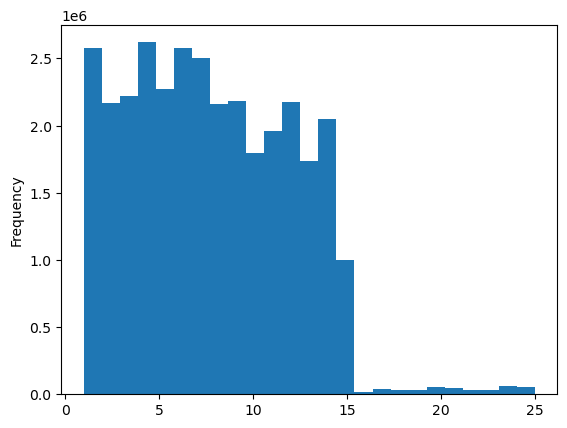

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

# 1. Use group by and agg to group data

In [13]:
# Business question 1
# The marketing team at Instacart wants to know whether there’s a difference between the spending habits of the three types of customers you identified. 
# Use the loyalty flag you created and check the basic statistics of the product prices for each loyalty category (Loyal Customer, Regular Customer, and New Customer). 
# What you’re trying to determine is whether the prices of products purchased by loyal customers differ from those purchased by regular or new customers.
# so try group by loyalty and agg mean, min, max prices
ords_prods_merge.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773575  1.0  25.0
New customer      7.801206  1.0  25.0
Regular customer  7.798262  1.0  25.0

# 2. Create new categories

In [15]:
#loyal customers spend less per product! min and max are not useful here. 
# Business question 2
#The team now wants to target different types of spenders in their marketing campaigns. This can be achieved by looking at the prices of the items people are buying. Create a spending flag for each user based on the average price across all their orders using the following criteria:
#If the mean of the prices of products purchased by a user is lower than 10, then flag them as a “Low spender.”
#If the mean of the prices of products purchased by a user is higher than or equal to 10, then flag them as a “High spender.”
ords_prods_merge['av_product_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_54434/885758859.py:6: FutureWarning: The provided callable <function mean at 0x110f2ee80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  ords_prods_merge['av_product_price'] = ords_prods_merge.groupby(['user_id'])['prices'].transform(np.mean)


In [17]:
 # check new column
ords_prods_merge['av_product_price']

0           6.935811
1           6.935811
2           7.930208
3           4.972414
4           4.972414
              ...   
32404854    8.220313
32404855    7.364516
32404856    8.500344
32404857    8.500344
32404858    8.133333
Name: av_product_price, Length: 32404859, dtype: float64

# 3. Create flags

In [19]:
# create new spending flag
ords_prods_merge.loc[ords_prods_merge['av_product_price'] >= 10, 'spending_flag'] = 'High spender'

In [21]:
ords_prods_merge.loc[ords_prods_merge['av_product_price'] < 10, 'spending_flag'] = 'Low spender'

In [23]:
ords_prods_merge['spending_flag'].value_counts(dropna=False)

spending_flag
Low spender     32285131
High spender      119728
Name: count, dtype: int64

In [25]:
# create frequent customer flag
# Business question 3
# In order to send relevant notifications to users within the app (for instance, asking users if they want to buy the same item again), the Instacart team wants you to determine frequent versus non-frequent customers. Create an order frequency flag that marks the regularity of a user’s ordering behavior according to the median in the “days_since_prior_order” column. The criteria for the flag should be as follows:
# If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
# If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
# If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”
# to do this create new column with median values of days since prior order column
ords_prods_merge['Frequent customer'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)

/var/folders/jw/8t4p8wwd697952d93tqmdh180000gp/T/ipykernel_54434/4260056855.py:8: FutureWarning: The provided callable <function median at 0x111869b20> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  ords_prods_merge['Frequent customer'] = ords_prods_merge.groupby(['user_id'])['days_since_prior_order'].transform(np.median)


In [27]:
# check new columns established
ords_prods_merge.head(19)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,reordered,_merge,price_range_loc,Busiest_days,busiest period of day,max_order,loyalty_flag,av_product_price,spending_flag,Frequent customer
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,0,both,Mid-range product,Regularly busy,most_orders,32,Regular customer,6.935811,Low spender,8.0
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,1,both,Mid-range product,Regularly busy,average orders,32,Regular customer,6.935811,Low spender,8.0
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,0,both,Mid-range product,Busiest days,average orders,5,New customer,7.930208,Low spender,8.0
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,0,both,Mid-range product,Slowest days,most_orders,3,New customer,4.972414,Low spender,9.0
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,1,both,Mid-range product,Slowest days,average orders,3,New customer,4.972414,Low spender,9.0
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,16,1,7,...,0,both,Mid-range product,Busiest days,average orders,26,Regular customer,6.935398,Low spender,11.0
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,3,2,14,...,0,both,Mid-range product,Regularly busy,most_orders,9,New customer,5.957576,Low spender,20.0
7,1,Chocolate Sandwich Cookies,61,19,5.8,1290456,910,12,3,10,...,0,both,Mid-range product,Slowest days,most_orders,12,Regular customer,6.680000,Low spender,6.0
8,1,Chocolate Sandwich Cookies,61,19,5.8,369558,1052,10,1,20,...,0,both,Mid-range product,Busiest days,average orders,20,Regular customer,7.162500,Low spender,10.0
9,1,Chocolate Sandwich Cookies,61,19,5.8,589712,1052,15,1,12,...,1,both,Mid-range product,Busiest days,most_orders,20,Regular customer,7.162500,Low spender,10.0


In [33]:
nan_count = ords_prods_merge['Frequent customer'].isna().sum()
print(f"NaN count: {nan_count}")

NaN count: 5


In [35]:
ords_prods_merge.loc[ords_prods_merge['Frequent customer'].isna(), 'frequency_flag'] = 'Unknown'

In [37]:
print(ords_prods_merge.dtypes)

product_id                   int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
New_customer_flag           object
add_to_cart_order            int64
reordered                    int64
_merge                    category
price_range_loc             object
Busiest_days                object
busiest period of day       object
max_order                    int64
loyalty_flag                object
av_product_price           float64
spending_flag               object
Frequent customer          float64
frequency_flag              object
dtype: object


In [39]:
#create frequency flag
# If the median of “days_since_prior_order” is higher than 20, then the customer should be labeled a “Non-frequent customer.”
ords_prods_merge.loc[ords_prods_merge['Frequent customer'].isnull(), 'frequency_flag']
ords_prods_merge.loc[ords_prods_merge['Frequent customer'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [41]:
# If the median is higher than 10 and lower than or equal to 20, then the customer should be labeled a “Regular customer.”
ords_prods_merge.loc[(ords_prods_merge['Frequent customer'] <= 20) & (ords_prods_merge['Frequent customer'] > 10), 'frequency_flag'] = 'Regular customer'

In [43]:
# If the median is lower than or equal to 10, then the customer should be labeled a “Frequent customer.”
ords_prods_merge.loc[ords_prods_merge['Frequent customer'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [45]:
ords_prods_merge['frequency_flag'].value_counts(dropna=False)

frequency_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
Unknown                         5
Name: count, dtype: int64

In [47]:
ords_prods_merge.shape

(32404859, 24)

In [33]:
# Export data to pkl
ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'newest_ords_prods_merged.pkl'))